In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) #Genera las figuras un poco mas grandes

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


Lineas de codigo comentadas <br>
Linea 1. Se refiere al numero que salidas que tendra la red neuronal en este caso al ser la data de mnist que esta contiene como resultado 10 salidas distintas (digitos de 0 al 9) <br>
Linea 2. Se mezclan y se dividen los datos entre los de entrenamient y test

In [4]:
nb_classes=10 #Se refiere al numero de salidas que tendra la red neuronal
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 302s 26us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Se procede a usar matplot para poder graficar los datos que al principio se encuentran como un vector <br>
Se usa imshow para traducir los datos de vectores a bit y usando atributos cmap se usa para colocar las graficas en escala de grises

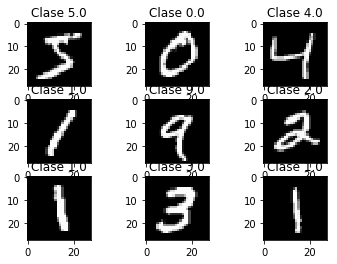

In [18]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray", interpolation='none')
    plt.title("Clase {:.1f}".format(y_train[i]))

A continuacion se procedera a tomar un solo vector por cada entrenamiento (numero) por lo cual se debe rediseñar el modelo, en este caso las imagenes contiene un ancho y largo de 28 pixeles por lo que al crear un unico vector que contiene la multiplicacion de ambos el cual serian 784 dimensiones.<br>
Se resideñaran las entradas para que no esten en la escala del 0-255 sino entre 0-1<br>
Se debe tener en cuenta que:<br>
* Los datos para el entrenamiento consta de **60000** (X_train)
* Los datos para el testeo consta de **10000** (X_test)
* La escala de blanco y negro esta en el rango de 0 a 255

In [24]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Caracteristica de la matriz de entrenamiento= {}".format(X_train.shape))
print("Caracteristica de la matriz de testeo= {}".format(X_test.shape))

Caracteristica de la matriz de entrenamiento= (60000, 784)
Caracteristica de la matriz de testeo= (10000, 784)


Con la clase *"to_categorical"* se procede a convertir una matriz con tantos numeros de clases existen en este caso se le coloca 10 ya que son las clases de salidas del sistema.
1. Ahora consta con una caracteristica de (60000, 10)

In [25]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

<h1> Construccion de la red neuronal</h1> <br>
Para este caso la red neuronal constara de 3 capas de neuronas en donde:<br>
1. La primera y segunda capa constara de 512 nodos <br>
2. Usaran la funcion de activacion RELU el cual da un resultado de 0 a Z<br>
3. La tercera capa (Salida) constara de 10 nodos (Se colocan 10 porque los resultados que se daran son del 0 al 10)<br>
4. Usara la funcion de activacion SOFTMAX el cual arrojara como resultado de la funcion de activacion 0 a 1<br><br>
La funcion Dropout permite que el modelo no exista un overfitting el cual causa que el modelo sepa de memoria de respuesta el cual esto no sirve a la hora de predecir con nuevos ejemplos, en la cual se selecciona nodos que se saldran con una probabilidad determinada (por lo general del 20% o 0.2)

In [30]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

<h1>Compilación del modelo</h1>
<p>Al ser keras construido sobre tensorflow se pide que especifique la funcion de perdida y su optimizador el cual se van a utilizar como lo es la funcion:</p>
<h3>categorical_crossentropy</h3>
<p>Es una funcion de perdida la cual se maneja por medio de dimensiones entre clases para manejo de resultados en el cual todos los resultados deben de ser 0 excepto en 1 que corresponde a la clase de la muestra esto se maneja con el metodo anterior que fue "to_categorical" y que su funcion de activacion mejor es la softmax ya que arroja resultados de 0 a 1 y que este le permintira decidir cual es la mejor.</p>
<h3>Adam</h3>
<p>Es un algoritmo creado por uno de los desarrolladores de OpenAI el cual tiene como objetivo adaptar su taza de aprendizaje en medida de los resultados del modelo por varias capas, este algoritmo es muy bien funcional en donde si implemente reconocimiento de caracteres, analisis de sentimiento y en redes convolucionales que manejan reconocimiento de imagenes

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

<h1>Entrenamiento del modelo</h1>
<p>El modelo comenzara con su entrenamiento el cual constara con 4 iteraciones o numeros de epocas, mostrando el tiempo que tarda cada una, mostrara los valores de perdida y utilizara los datos de test para la validación</p>

In [40]:
model.fit(x=X_train, y=Y_train, batch_size=128, epochs=4, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2497 - val_loss: 0.1004
Epoch 2/4
60000/60000 [==============================] - 58s 972us/step - loss: 0.1004 - val_loss: 0.0802
Epoch 3/4
60000/60000 [==============================] - 60s 994us/step - loss: 0.0717 - val_loss: 0.0728
Epoch 4/4
60000/60000 [==============================] - 59s 979us/step - loss: 0.0557 - val_loss: 0.0809


<h1>Evaluación del entrenamiento</h1>

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Puntuacion del test= ',score)

Puntuacion del test=  0.08085701481878059


<h1>Generar predicciones con datos correctos (test)</h1>
<p>se colocaran los datos que el esten correcto cosa que el si puede comprobar

In [73]:
#Se daran los mismo datos de entrada como ejemplos
predicted_classes = model.predict_classes(X_test)

<h1>Comprobando resultados<h1>

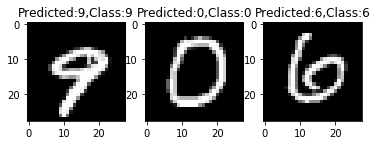

In [72]:
plt.figure()
for i, correct in enumerate(correct_indices[9:12]):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('Predicted:{},Class:{}'.format(predicted_classes[correct], y_test[correct]))